Regresion lineal gradiente descendiente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
x = np.array([20, 45, 80, 100, 160, 175, 190, 215, 223, 257,289,300,358,400,428,460,489])
y = np.array([10, 19, 27, 38, 47, 56, 63, 74, 87, 96, 110, 126,148,159,170,200,216])

In [3]:
len(x)

17

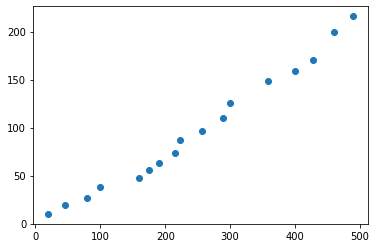

In [4]:
plt.scatter(x,y)

In [21]:
def descripcion_modelo(x, m, b):
    n = x.shape[0]
    #obtener el tamaño del conjunto de dato
    y_est = np.zeros(n) #crear un vector de ceros de tamaño n
    for i in range(n):
        y_est[i] = m*x[i] + b #calcular el valor de y_est
    return y_est

In [26]:
m = 0.4
b = 0.1
descripcion_modelo(x, m, b)

array([  8.1,  18.1,  32.1,  40.1,  64.1,  70.1,  76.1,  86.1,  89.3,
       102.9, 115.7, 120.1, 143.3, 160.1, 171.3, 184.1, 195.7])

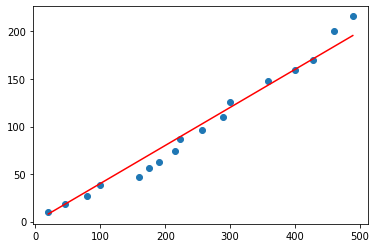

In [27]:
plt.scatter(x,y)
plt.plot(x, descripcion_modelo(x, m, b), c='r')

Creando la función de costo

$$J(m,b) = \frac{1}{2n} \sum\limits_{i = 0}^{n-1} (f_{m,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

In [28]:
def costo(x, y, m, b):
    n = x.shape[0]
    suma_costos = 0
    y_est = np.zeros(n)
    for i in range(n):
        y_est[i] = m*x[i] + b
        costo = (y_est[i] - y[i])**2
        suma_costos= suma_costos + costo
    costo_total = (1/(2*n)) * suma_costos
    return costo_total

In [29]:
costo(x, y, m, b)

48.65205882352939

Gradiente descendiente

Repetir hasta alcanzar la convergencia

$$ m = m -  \alpha \frac{\partial J(m,b)}{\partial m} $$

$$ b = b -  \alpha \frac{\partial J(m,b)}{\partial b} $$

El Gradiente se define por

$$
\begin{align}
\frac{\partial J(m,b)}{\partial m}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{m,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(m,b)}{\partial b}  &= \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{m,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [31]:
def gradiente(x, y, m, b):
    n = x.shape[0]
    dj_dm = 0
    dj_db = 0
    y_est = np.zeros(n)

    for i in range(n):
        y_est[i] = m*x[i] + b
        dj_dm = dj_dm + (y_est[i] - y[i])*x[i]
        dj_db = dj_db + (y_est[i] - y[i])
    dj_dm = (1/n) * dj_dm
    dj_db = (1/n) * dj_db
    return dj_dm, dj_db

In [48]:
#El alpha es el tamaño del pasp para encontrar la convergencia
costo_final = []
def gradiente_descendiente(x, y, m_inicial, b_inicial, alpha, iteraciones, funcion_costo, funcion_gradiente):
    m = m_inicial
    b = b_inicial
    for i in range(iteraciones):
        dj_dm, dj_db = funcion_gradiente(x, y, m, b)
        m = m - alpha * dj_dm
        b = b - alpha * dj_db
        costo_final.append(funcion_costo(x, y, m, b))
    return m, b

In [69]:
m_inicial =0.4
b_inicial = 0.1
alpha = 0.0001
m, b = gradiente_descendiente(x, y, m_inicial, b_inicial, alpha, 49, costo, gradiente)
print('m: ', m, 'b: ', b)
print('Costo final', costo_final)

m:  1.3252816641588576e+39 b:  4.056000172269124e+36
Costo final [41113857.64034308, 259947937534.49, 1643557981113057.5, 1.0391630198716623e+19, 6.570256688708458e+22, 4.154138679881966e+26, 2.6265135426670416e+30, 1.6606507200210734e+34, 1.049970148300166e+38, 6.638586302527743e+41, 13421.88072683298, 342497265.1657293, 8771227618146.658, 2.2462790964444205e+17, 5.752638055717204e+21, 1.4732294242717955e+26, 3.7728863097569117e+30, 9.662222917782956e+34, 2.474459711958436e+39, 6.337000210206665e+43, 74.09563256448733, 1339.28105476978, 64249.043399771486, 3192356.507028661, 158733497.15163338, 7892817670.663422, 392460255936.81384, 19514583995045.652, 970337716453615.1, 4.824880121521872e+16, 48.5713442024848, 48.50310266744923, 48.445406535117115, 48.396626040671265, 48.35538329524813, 48.32051335915749, 48.29103133113707, 48.26610452387701, 48.24502893974578, 48.22720938213211, 48.5713442024848, 48.50310266744923, 48.445406535117115, 48.396626040671265, 48.35538329524813, 48.320513

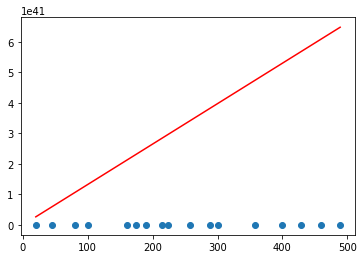

In [70]:
plt.scatter(x,y)
plt.plot(x, descripcion_modelo(x, m, b), c='r')

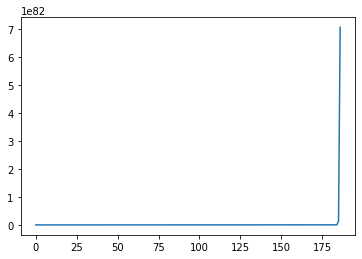

In [71]:
x_loss = [x for x in range(len(costo_final))]
plt.plot(x_loss, costo_final)